In [2]:
# import the modules
import urllib.request
import networkx as nx
import numpy as np 
import pandas as pd
import random
import matplotlib.pyplot as plt 

import networkx as nx
from node2vec import Node2Vec
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, roc_curve, auc
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
facebook_url = "https://raw.githubusercontent.com/wang422003/Complex-Networks_exercise/main/Datasets/Group3/Facebook-Ego/348.edges"
urllib.request.urlretrieve(facebook_url, "facebook.edges")
facebook_network = nx.read_edgelist("facebook.edges", nodetype=int)

In [4]:
# Randomly delete 10% of the edges  
edges_to_delete = list(facebook_network.edges)
np.random.shuffle(edges_to_delete)
edges_to_delete = edges_to_delete[:int(0.1 * len(edges_to_delete))]
facebook_network.remove_edges_from(edges_to_delete)

In [5]:
# Extract features
def extract_features(graph): 
    features = {}
    for node in graph.nodes:
        features[node] = np.random.rand(64)   
    return features

In [6]:
features = extract_features(facebook_network)

In [7]:
# Prepare the target vector
def prepare_target(graph, deleted_edges):
    target = []
    for edge in graph.edges:
        target.append(1 if edge not in deleted_edges else 0)
    return target

target = prepare_target(facebook_network, edges_to_delete)

In [8]:
# Create node2vec embeddings
node2vec = Node2Vec(facebook_network)
model = node2vec.fit()

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 15.19it/s]


In [9]:
# Generate embeddings for all nodes
embeddings = {str(node): model.wv[str(node)] for node in facebook_network.nodes}


In [10]:
print(len(list(embeddings.values())), len(target))


148 1124


In [11]:
# Convert the embeddings dictionary view to a list of values
#embedding_values = list(embeddings.values())

# Extract nodes from the target vector (assuming target is a list of 0s and 1s)
#target_nodes = [edge[0] for edge in facebook_network.edges]

# Filter the embeddings to keep only those corresponding to target nodes
#filtered_embeddings = [embeddings[str(node)] for node in target_nodes]


In [11]:
adjacency_matrix = nx.adjacency_matrix(facebook_network).todense()
target = np.array(adjacency_matrix).flatten()


# Extract edges as features
edges_as_features = list(facebook_network.edges)
X_edges = [np.concatenate((embeddings[str(edge[0])], embeddings[str(edge[1])])) for edge in edges_as_features]


# Ensure the lengths are consistent
if len(X_edges) != len(target):
    print("Lengths are inconsistent. Adjusting the lengths.")
    min_len = min(len(X_edges), len(target))
    X_edges = X_edges[:min_len]
    target = target[:min_len]

# Train RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_edges, target)

/tmp/ipykernel_20214/1702359525.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adjacency_matrix = nx.adjacency_matrix(facebook_network).todense()


Lengths are inconsistent. Adjusting the lengths.


RandomForestClassifier()

In [13]:
# Make predictions on the missing edges
missing_edges = list(set(facebook_network.edges) - set(edges_to_delete))
 

# Extract embeddings for missing edges
X_missing_edges = [np.concatenate((embeddings[str(edge[0])], embeddings[str(edge[1])])) for edge in missing_edges]
y_missing_edges_true = [1 if facebook_network.has_edge(edge[0], edge[1]) else 0 for edge in missing_edges]

# Reshape the y_missing_edges_true to a 2D array
y_missing_edges_true = np.array(y_missing_edges_true).reshape(-1, 1)

# Predict on missing edges
y_missing_edges_pred = model.predict(X_missing_edges)

In [ ]:
print(y_missing_edges_pred)

In [15]:
# Evaluate the performance of the model on missing edges
accuracy = accuracy_score(y_missing_edges_true, y_missing_edges_pred)
#roc_auc = roc_auc_score(y_missing_edges_true, y_missing_edges_pred)
precision = precision_score(y_missing_edges_true, y_missing_edges_pred)


In [16]:
print(y_missing_edges_true)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1124: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


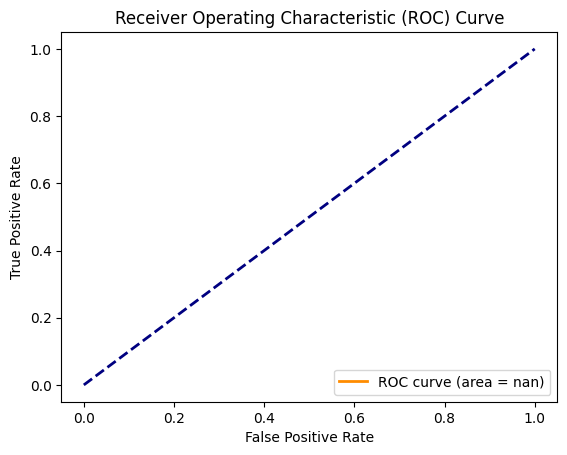

In [19]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_missing_edges_true, y_missing_edges_pred)
roc_auc_curve = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_curve))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [18]:
# Print the results
print("Accuracy:", accuracy)
#print("AUROC:", roc_auc)
print("Precision:", precision)

Accuracy: 0.20640569395017794
Precision: 1.0
